In [1]:
import numpy as np
import torch
import mmcv
from mmcv.runner import load_checkpoint
from mmseg.models import build_segmentor

from mmseg.apis import inference_segmentor

In [2]:
def init_model(config_filepath, checkpoint_filepath, to_gpu=True):
    '''Initializes a model from a given configuration and checkpoint file.
    
    Exampels:
        config_filepath: deeplabv3plus_r50-d8_512x1024_40k_cityscapes.py
        checkpoint_filepath: deeplabv3plus_resnet_50_40k_cityscapes.pth
    '''
    cfg = mmcv.Config.fromfile(config_filepath)
    cfg.model.pretrained = None
    cfg.data.test.test_mode = True
    
    model = build_segmentor(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
    checkpoint = load_checkpoint(model, checkpoint_filepath, map_location='cpu')
    model.cfg = cfg
    model.eval()
    
    if to_gpu:
        device = torch.device("cuda")
        model.to(device)
    
    return model

### Configuration files

In [10]:
config_filepath = "../configs/deeplabv3plus/deeplabv3plus_r50-d8_512x1024_40k_cityscapes.py"
checkpoint_filepath = "../checkpoints/deeplabv3plus_resnet_50_40k_cityscapes.pth"

checkpoint_filepath = "../checkpoints/deeplabv3plus_r50_d8_512x102440k_cityscapes.pth"

### Initialize model

In [11]:
model = init_model(config_filepath, checkpoint_filepath)

OSError: ../checkpoints/deeplabv3plus_resnet_50_40k_cityscapes.pth is not a checkpoint file

### Inference

In [5]:
test_img = img = mmcv.imread('test.png')

output = inference_segmentor(model, img)

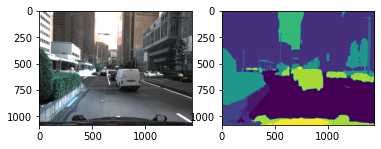

In [6]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(test_img)
plt.subplot(1,2,2)
plt.imshow(output[0])
plt.show()